In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
from dropletsProject.vectorsAndConstants import *
from dropletsProject.utilityFunctions import *
import matplotlib
import matplotlib.pyplot as plt
import re

In [2]:
pappu_b: pd.DataFrame = pd.read_excel(pathPappuA, sheet_name=1, header=[3])
# Selecting the columns of interest
pappu_b: pd.DataFrame = pappu_b.iloc[:, 2:27]
display(pappu_b.head())

# Renaming columns
pappu_columns: List[str] = renameColumns(pappu_b)

pappu_b.columns: List[str] = ['Size'] + pappu_columns

,Size (nm),0.125 μM,Unnamed: 4,Unnamed: 5,0.25 μM,Unnamed: 7,Unnamed: 8,0.5 μM,Unnamed: 10,Unnamed: 11,...,Unnamed: 17,2 μM,Unnamed: 19,Unnamed: 20,2.5 μM,Unnamed: 22,Unnamed: 23,3 μM,Unnamed: 25,Unnamed: 26
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,46480,147128,71560,0,0,0,...,115580,35871,80611,179597,0,0,0,0,0,0
2,25,76320,71334,287313,399727,760163,259407,569843,200414,293331,...,1220809,1750484,1993285,2356317,70356,34247,0,50844,0,0
3,35,305279,332893,194962,1691866,948161,375692,2455942,1996434,1888763,...,3525177,3414879,4690082,3965508,337707,253430,352017,1177897,112946,72765
4,45,444042,535007,964549,1403691,1185201,2012637,6332479,5981593,4271181,...,8003886,5954516,6075121,6688203,1287507,1417836,1049150,3643854,1438174,502079


In [3]:
pappu_b_len: int = len(pappu_b)
dict_df_conc_b: dict = {}
for conc in pappu_b_conc:
    dict_df_conc_b[conc]: pd.DataFrame = pd.DataFrame(columns=[conc])

for _ in range(num_tries):

    mask_dict_b: dict = {}

    for conc in pappu_b_conc:
        mask: np.array = np.zeros((pappu_b_len, 3))
        mask[np.arange(pappu_b_len), np.random.choice(3, pappu_b_len)] = 1
        mask_dict_b[conc] = mask

    masked_pappu_b = {}

    for conc in pappu_b_conc:
        column_idx: int = pappu_b_conc.index(conc)
        columns: np.array = np.array(
            pappu_b)[:, column_idx * 3 + 1: column_idx * 3 + 4]
        columns_masked = np.sum(columns * mask_dict_b[conc], axis=1)
        masked_pappu_b[conc] = columns_masked

    cum_pappu_b: dict = {}

    for conc in pappu_b_conc:
        cum_pappu_b[conc] = \
            1 - \
            np.insert(np.cumsum(masked_pappu_b[conc]), 0, 0)[
            :-1]/np.sum(masked_pappu_b[conc])

    dataframe_cum_b: pd.DataFrame = pd.DataFrame(cum_pappu_b)

    for conc in pappu_b_conc:
        dict_df_conc_b[conc]: pd.DataFrame = pd.concat(
            [dict_df_conc_b[conc], dataframe_cum_b[conc]], axis=1)


final_cum_dict_b: dict = {}

for conc in pappu_b_conc:
    final_cum_dict_b[conc]: pd.DataFrame = pd.DataFrame(np.nanmean(
        dict_df_conc_b[conc], axis=1), columns=['mean'])
    final_cum_dict_b[conc]['std'] = np.std(dict_df_conc_b[conc], axis=1)

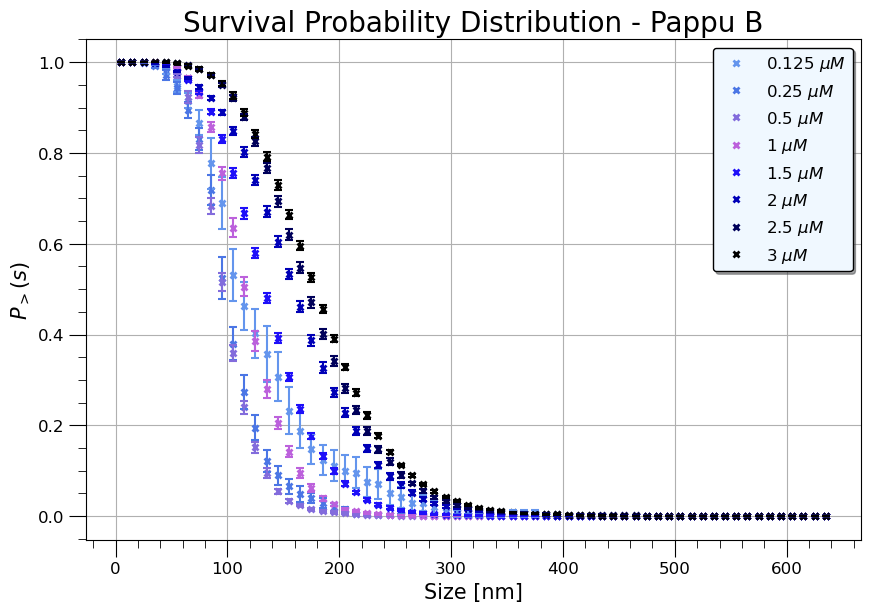

In [4]:
fig, ax = createCanvas()

n_colors = len(pappu_b_conc)
colors = {conc: cmapPappuB(np.linspace(0, 1, n_colors))[
    i] for i, conc in enumerate(pappu_b_conc)}
for conc in pappu_b_conc:
    ax.plot(np.array(pappu_b['Size']), final_cum_dict_b[conc]['mean'],
            label=f'{conc} $ \mu M$', marker='x', zorder=4, markersize=5, markeredgewidth=2,
            linestyle='None', color=colors[conc])
    ax.errorbar(pappu_b['Size'], final_cum_dict_b[conc]['mean'], yerr=final_cum_dict_b[conc]['std'],
                linestyle='None', fmt='none', capsize=3, capthick=1.5, zorder=5, color=colors[conc])


ax.legend(facecolor='aliceblue', fontsize=12, shadow=True, edgecolor='black')


ax.set_xlabel('Size [nm]', fontsize=15)
ax.set_ylabel('$P_>(s)$', fontsize=15)
ax.set_title('Survival Probability Distribution - Pappu B', fontsize=20)

ax.grid(zorder=1)

ax.tick_params(axis='both', which='major', labelsize=12, length=12)
ax.tick_params(axis='both', which='minor', labelsize=12, length=6)
ax.minorticks_on()

In [5]:
k_array_lines_b, k_array_std_b = k_array_lines_pappu(
    pappu_b, pappu_b_conc, k_to_try_pappu)


def keysTail(i: int) -> List[float]:
    return (tail2 << fC >> strToFloat)(k_array_lines_b[i].keys())


def valuesTail(i: int) -> List[float]:
    return (tail2 << fC >> list)(k_array_lines_b[i].values())

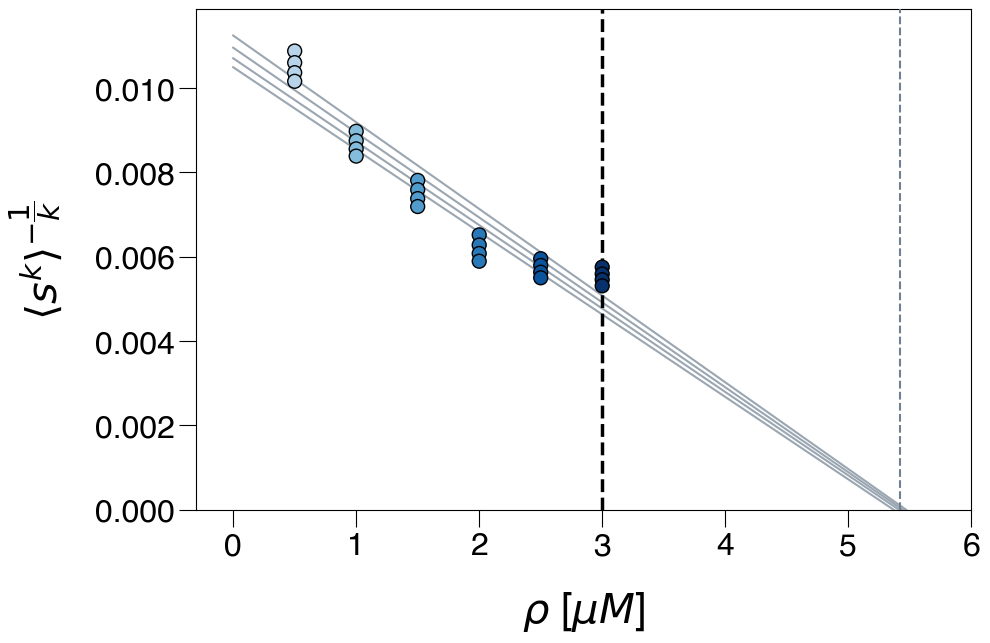

In [6]:
setFontMatplotlib()
fig, ax = createCanvas()


slopes_b: dict = {}
intercepts_b: dict = {}
r_b: dict = {}
se_b: dict = {}

x_axis: np.array = np.linspace(0, 6, 1000)
rho_c_list: List[float] = []
var_list_b: List[float] = []

n_colors: int = (len << fC >> tail2)(pappu_b_conc)

colors: list = [cmapPappuBBlues(np.linspace(0.3, 1, n_colors))[
    i] for i in range(n_colors)]

for i in range(len(k_to_try_pappu)):
    ax.scatter(keysTail(i), valuesTail(i), label=f'k = {k_to_try_pappu[i]}', color=colors,
               alpha=1, zorder=4, edgecolor='black', s=100)

    slope, intercept, r, _, se = linregress(keysTail(i), valuesTail(i))

    popt, pcov = curve_fit(line, keysTail(i), valuesTail(i))

    var_list_b.append(varPropagationDead(*(list(popt) + list(np.diag(pcov)))))

    slopes_b[k_to_try_pappu[i]] = slope
    intercepts_b[k_to_try_pappu[i]] = intercept
    r_b[k_to_try_pappu[i]] = r
    se_b[k_to_try_pappu[i]] = se

    rho_c_list.append((- intercept / slope))

    ax.plot(x_axis, slope * x_axis + intercept,
            label=f'k = {k_to_try_pappu[i]} fit', color='slategrey', alpha=0.7, zorder=3)
ax.axvline(critical_c_b, color='black', linestyle='--', label='Critical concentration',
           zorder=3, linewidth=2.5)

ax.axvline(np.mean(rho_c_list), color='slategrey', linestyle='--', label='Critical concentration',
           zorder=3)

ax.set_ylim(bottom=0)
ax.set_xlim(right=6)

ax.set_xlabel('$\\rho$ [$\mu M$]', fontsize=30, labelpad=20)
ax.set_ylabel(
    '$ \left <  s^{k} \\right >^{-\dfrac{1}{k}} $', fontsize=30, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=23, length=12)
# fig.savefig('../../pdfPlots/FigS3a.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
# fig.savefig('../../pdfPlots/FigS3a.svg', dpi = 300, facecolor = 'white')

In [7]:
y_bar, var = weightedAverage(var_list_b, rho_c_list)
critical_c_b_final = np.mean(rho_c_list)

In [8]:
ratio_arr_list: List[float] = []
k_mom_list: List[float] = []
k_mom_1_list: List[float] = []
k_mom_std: List[float] = []
k_mom_1_std: List[float] = []
for k in k_to_try_pappu:
    k_mom = dict_moment(pappu_b, pappu_b_conc, k)
    k_mom_list.append(k_mom)
    k_mom_std.append(dict_moment_std(pappu_b, pappu_b_conc, k))
    k_1_mom = dict_moment(pappu_b, pappu_b_conc, k + 1)
    k_mom_1_list.append(k_1_mom)
    k_mom_1_std.append(dict_moment_std(pappu_b, pappu_b_conc, k + 1))

    k_mom_arr = np.array(list(k_mom.values()))
    k_1_mom_arr = np.array(list(k_1_mom.values()))
    ratio_dict = {np.abs((float(conc) - critical_c_b_final)/critical_c_b_final):
                  k_1_mom_arr[i] / k_mom_arr[i]
                  for i, conc in enumerate(pappu_b_conc)}
    ratio_arr_list.append(ratio_dict)

In [9]:
err_dict: dict = {}
for i in range(len(k_to_try_pappu)):
    err_dict[k_to_try_pappu[i]]: dict = {}
    for conc in pappu_b_conc:

        yerr: float = np.sqrt((1 / k_mom_1_list[i][conc])**2 * k_mom_1_std[i][conc] ** 2 +
                              (1 / k_mom_list[i][conc])**2 * k_mom_std[i][conc] ** 2)

        err_dict[k_to_try_pappu[i]][conc] = yerr

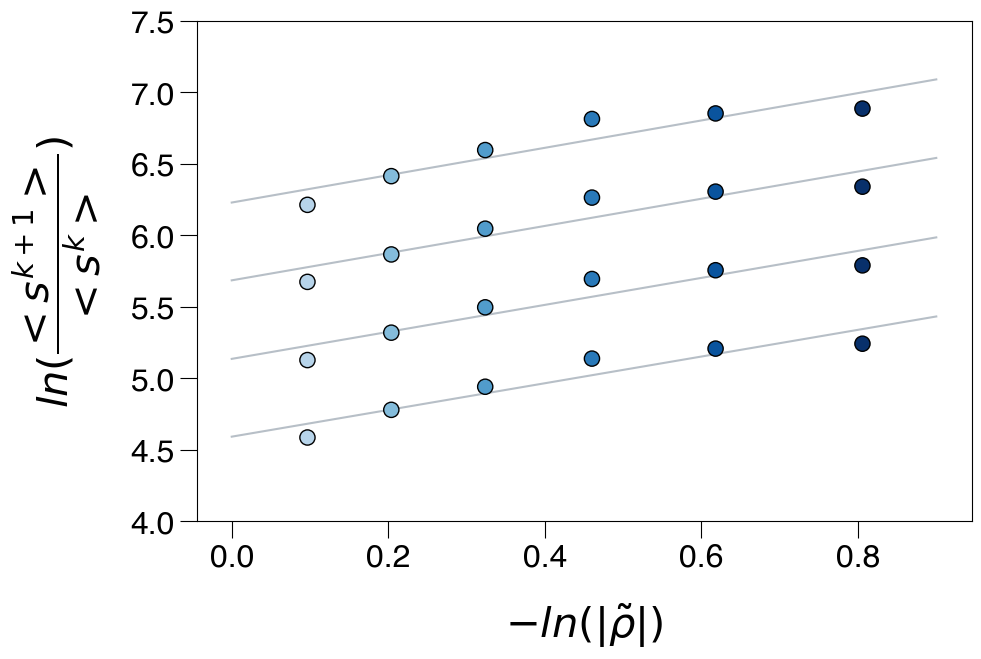

In [10]:
x_axis: np.array = np.linspace(-0.9, -0, 100)
fig, ax = createCanvas()

for i, dict_ in enumerate(ratio_arr_list):
    ax.scatter(-tail2(np.log(np.array(list(dict_.keys())))),
               tail2(np.log(np.exp(i/2)*np.array(list(dict_.values())))), zorder=3, color=colors, label=f'k = {k_to_try_pappu[i]}',
               s=120, edgecolor='black')

    slope, intercept, r, p, se = linregress(np.log(np.array(list(dict_.keys())))[2:],
                                            np.log(np.array(list(dict_.values())))[2:])

    ax.plot(-x_axis, slope * x_axis + intercept + i /
            2, color='slategrey', alpha=0.5, zorder=1)

ax.set_ylim(bottom=4, top=7.5)

# ax.set_title("$ \\varphi$ Estimation - Pappu B", fontsize=25)
ax.set_xlabel('$-ln ( | \\tilde{\\rho}| )$', fontsize=30, labelpad=20)
ax.set_ylabel('$ln(\dfrac{ <s^{k+1}>}{<s^{k}>})$', fontsize=30, labelpad=20)
# ax.legend(facecolor = 'aliceblue', fontsize = 12, edgecolor = 'black', shadow = True)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.tick_params(axis='both', which='major', labelsize=23, length=12)
# savefig('../../paperPlots/pdfPlots/FigS1bReversed.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
# fig.savefig('../../paperPlots/pdfPlots/FigS1bReversed.svg', dpi = 300, facecolor = 'white')

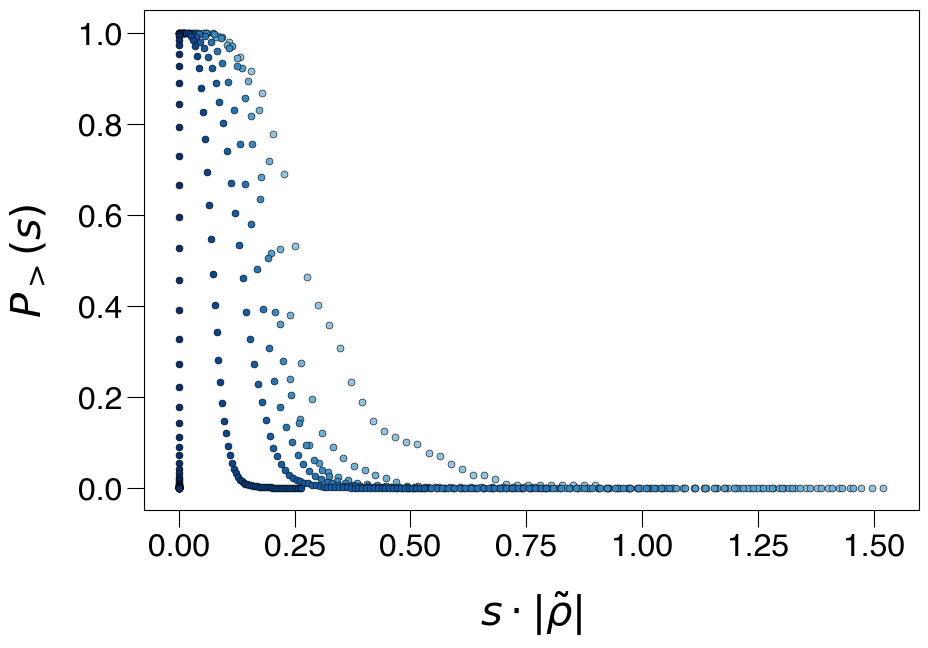

In [11]:
fig, ax = createCanvas()

n_colors = len(pappu_b_conc)
colors = {conc: cmapPappuBBlues(np.linspace(0.4, 1, n_colors))[
    i] for i, conc in enumerate(pappu_b_conc)}
for conc in pappu_b_conc:
    ax.scatter(np.array(pappu_b['Size'])*(np.abs((float(conc) - critical_c_b)/(critical_c_b))) / 400,
               final_cum_dict_b[conc]['mean'], label=f'{conc} $ \mu M$', zorder=4, color=colors[conc], s=25, edgecolor='black',
               linewidth=0.4)
ax.set_xlabel('$s \cdot | \\tilde{\\rho}|$', fontsize=30, labelpad=20)
ax.set_ylabel('$P_>(s)$', fontsize=30, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=23, length=12)
# fig.savefig('../../pdfPlots/FigS3b.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
# fig.savefig('../../pdfPlots/FigS3b.svg', dpi = 300, facecolor = 'white')

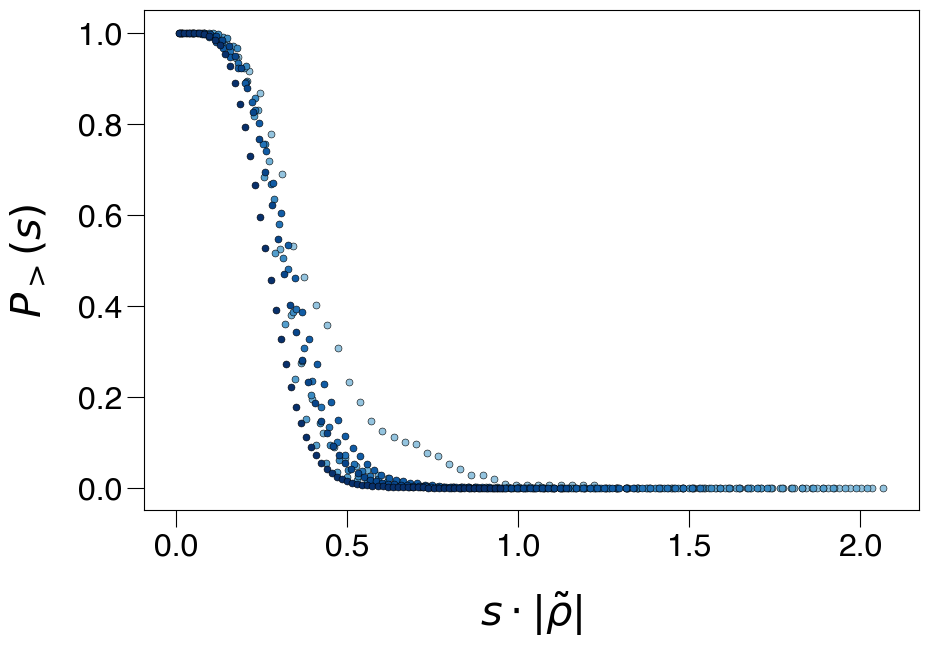

In [12]:
fig, ax = createCanvas()

for conc in pappu_b_conc:
    ax.scatter(np.array(pappu_b['Size'])*(np.abs((float(conc) - critical_c_b_final)/(critical_c_b_final))/300),
               final_cum_dict_b[conc]['mean'], label=f'{conc} $ \mu M$', zorder=4, color=colors[conc], s=25, edgecolor='black',
               linewidth=0.4)
ax.set_xlabel('$s \cdot | \\tilde{\\rho}|$', fontsize=30, labelpad=20)
ax.set_ylabel('$P_>(s)$', fontsize=30, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=23, length=12)
# fig.savefig('../../newCollapse2.pdf', dpi=300, facecolor='white', bbox_inches='tight')
# fig.savefig('../../pdfPlots/FigS3c.svg', dpi = 300, facecolor = 'white')